#Homework 4
**Jimmy Williams, Allie DeAbreu, Colin Burke**

##Sampling

In [53]:
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

def square(side):
  ax = plt.figure(figsize=(5,5)).add_subplot(1,1,1)
  plt.scatter(0,0)
  plt.scatter(0,side)
  plt.scatter(side,0)
  plt.scatter(side,side)
  plt.plot((-side,-side),(-side,side))
  plt.plot((side,-side),(-side,-side))
  plt.plot((side,side),(-side,side))
  plt.plot((side,-side),(side,side))
  
  return ax

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['solve']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [54]:
!pip install astropy

In [0]:
from astropy import units as u

def circle(radius,ax):
  angle = np.arange(0,360,0.1)
  angle *= u.degree
  x = np.cos(angle.to(u.rad))
  y = np.sin(angle.to(u.rad))
  #print('x:',x)
  #print('y:',y)
  
  ax.plot(x,y)

#ax = plt.figure().add_subplot(1,1,1)

780
3.12


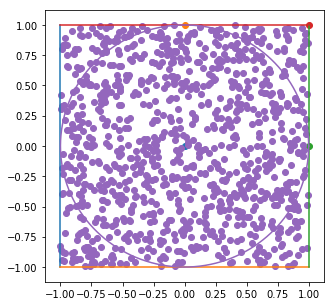

In [56]:
axis = square(1)
circle(1,axis)

np.random.seed(300)
num_x = 2 * np.random.rand(1000) - 1
num_y = 2 * np.random.rand(1000) - 1

axis.scatter(num_x,num_y)

r = np.sqrt((num_x**2) + (num_y**2))
#print(r)

r_in = r[r < 1]

print(len(r_in))
print((4 * len(r_in))/1000)

#Testing the siginificance of Dark Matter

In [57]:
import pandas as pd
import numpy as np
import pylab as pl
%pylab inline


import astropy

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axis', 'square']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


##Assuming Newtonian Framework 

In [0]:
from sympy import symbols
from sympy.solvers import solve

In [0]:
M, G, v, r, m = symbols('M, G, v, r, m')

Fnet = (M*v**2)/r 
Fgrav = (G*M*m)/r**2


In [60]:

solve(Fnet, Fgrav)

[]

##Galaxy Rotational Curves

###Data ingestion


In [61]:
m31 = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS/master/HW4/m31.csv", skiprows = [1])

m31.head()

,#M31,Grand,Rotation,Curve
0,0.100,183.939,0.000,0.000
1,0.120,190.710,10.265,12.191
2,0.144,204.141,22.634,21.808
3,0.173,207.601,4.573,4.200
4,0.207,210.188,3.943,3.258


In [62]:
m31.describe()

,#M31,Grand,Rotation,Curve
count,55.000000,55.000000,55.000000,55.000000
mean,205.853182,226.079255,55.034818,16.165855
std,415.523904,42.799892,49.254792,14.876951
min,0.100000,121.974000,0.000000,0.000000
25%,1.177000,208.894500,11.945500,3.224000
50%,13.737000,229.124000,30.697000,12.065000
75%,161.675000,244.102500,99.980000,23.641000
max,1887.071000,414.942000,147.835000,54.110000


In [0]:
apparentSizeM31 = 3.1674
distanceM31 = 778 
m31DistanceUncertainty = 33



In [64]:
from astropy import units as u
m31angS = (apparentSizeM31 * u.degree)
print("Angular Size of the visible component of Andromeda: {:.2f}".format(m31angS.to(u.rad)  ))

Angular Size of the visible component of Andromeda: 0.06 rad


In [65]:
from astropy import units as u
m31VisibleComp = distanceM31 * u.kiloparsec
m31VCuncertainty = m31DistanceUncertainty * u.kiloparsec
print("size of the visable component of Andromeda: {:.2f} ".format(m31VisibleComp.to(u.kiloparsec)) + "+/- {:.2f}".format(m31VCuncertainty.to(u.kiloparsec)))

size of the visable component of Andromeda: 778.00 kpc +/- 33.00 kpc


In [66]:
m31PhysicalS = m31angS * m31VisibleComp
m31PSuncertainty = m31angS * m31VCuncertainty

print("Physical size of the Andromeda Galazy: {:.2f}".format(m31PhysicalS) + " +/- {:.2f}".format(m31PSuncertainty))

Physical size of the Andromeda Galazy: 2464.24 deg kpc +/- 104.52 deg kpc


In [67]:

m31Size = [m31PhysicalS,m31PSuncertainty]
uncertMinR = m31Size[1]/m31angS
first = m31.loc[[0],["Grand"]]
first


,Grand
0,183.939


##Find the first measurement in your data table that includes all the luminous mass

In [68]:
def getradii(gal, gsize, n):
  rsofGal = gal[["#M31"]]
  minR = rsofGal.min()
  vofMinR = m31.loc[[0],["Grand"]]
  dvofMinR = m31.loc[[0],["Rotation"]]
  errofMinR = m31.loc[[0],["Curve"]]
  
  return(minR,vofMinR, dvofMinR,errofMinR)
\


gal = m31
gsize = m31PhysicalS
n = 1

print(getradii(gal, gsize, n))


(#M31    0.1
dtype: float64,      Grand
0  183.939,    Rotation
0       0.0,    Curve
0    0.0)


##Data Visualization

In [69]:
def plotGal(gal, rds):
  velocity = gal[["Grand"]]
  radius = gal[["#M31"]]
  pl.plot(rds, gal)
  pl.legend()
  
  
  
  
plotGal(m31, minR)

NameError: ignored

In [0]:
def vratios(gal, rds, rd, err='dv'):
  
  
  
  

###Data ingestion


In [70]:
mw = pd.read_csv("https://raw.githubusercontent.com/fedhere/DSPS/master/HW4/mw.csv", skiprows = [1])

mw.head()

,#MW,Grand,Rotation,Curve
0,0.010,119.061,41.832,32.714
1,0.012,115.268,35.199,17.100
2,0.014,117.392,35.152,14.429
3,0.017,118.475,35.252,14.870
4,0.021,110.386,33.817,14.427


In [71]:
mw.describe()

,#MW,Grand,Rotation,Curve
count,64.000000,64.000000,64.000000,64.000000
mean,142.281500,187.101219,48.249062,19.003297
std,348.144773,52.161901,41.255286,23.513466
min,0.010000,93.042000,3.370000,0.868000
25%,0.177250,138.676250,12.585500,2.709750
50%,3.133500,204.576000,35.288500,13.923000
75%,55.298250,235.920500,68.412750,24.791250
max,1682.532000,255.300000,165.096000,110.484000


In [72]:
mwPhysicalS = 53.5
mwPSuncertainty = 7.5

print("Physical size of the Milky Way Galazy: {:.2f}".format(mwPhysicalS*u.kiloparsec) + " +/- {:.2f}".format(mwPSuncertainty*u.kiloparsec))

Physical size of the Milky Way Galazy: 53.50 kpc +/- 7.50 kpc
